测试集MSE: 9.67

示例预测对比 (测试集第37个样本):
预测值: 18.48 | 真实值: 19.10


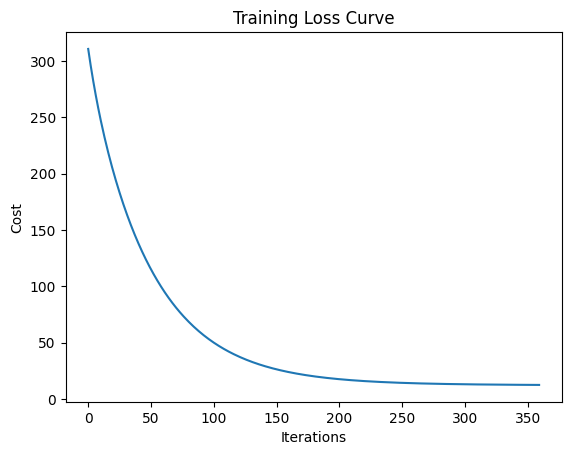

In [1]:
import numpy as np
import pandas as pd

data = np.loadtxt('housing_data.txt')
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
          'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=columns)


def split_data(df, train_size=450):
    X = df.drop('MEDV', axis=1).values
    y = df['MEDV'].values
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]
    return X_train, y_train, X_test, y_test

X_train_raw, y_train, X_test_raw, y_test = split_data(df)

def z_score_normalize(X, mu=None, sigma=None):
    if mu is None or sigma is None:
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


X_train_norm, mu_train, sigma_train = z_score_normalize(X_train_raw)
X_train = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]


def gradient_descent(X, y, alpha=0.01, iterations=360):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= alpha * gradient
        cost = np.sum(errors**2) / (2*m)
        cost_history.append(cost)
    return theta, cost_history


theta,cost_history = gradient_descent(X_train, y_train)

X_test_norm, _, _ = z_score_normalize(X_test_raw, mu_train, sigma_train)
X_test = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]

def calculate_mse(X, y, theta):
    predictions = X.dot(theta)
    return np.mean((predictions - y)**2)


test_mse = calculate_mse(X_test, y_test, theta)
print(f"测试集MSE: {test_mse:.2f}")


sample_idx = 36
test_pred = X_test[sample_idx].dot(theta)
print(f"\n示例预测对比 (测试集第{sample_idx+1}个样本):")
print(f"预测值: {test_pred:.2f} | 真实值: {y_test[sample_idx]:.2f}")

import matplotlib.pyplot as plt
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss Curve')
plt.show()